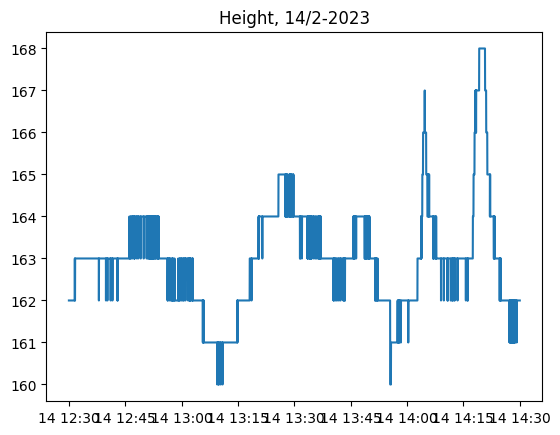

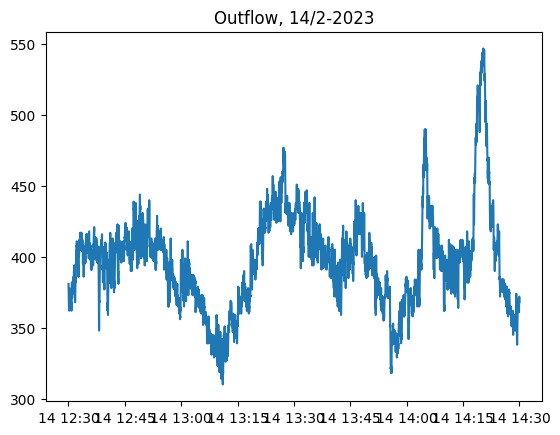

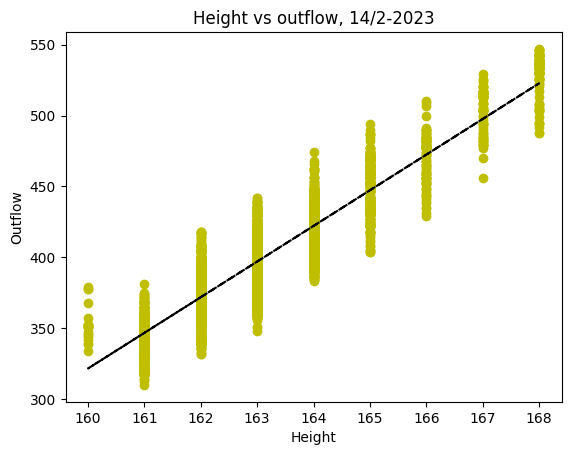

m = 25.13313403019309
b = -3699.679245689214


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_parquet("pump_station_data.parquet")

df = pd.DataFrame(data)

pump1_rpm = df["pump1_rpm"]['2023-02-14':'2023-02-16']
pump4_rpm = df['pump4_rpm']['2023-02-14':'2023-02-16']
height = df['height']['2023-02-14':'2023-02-16']
outflow = df['outflow']['2023-02-14':'2023-02-16']
pump1_power = df['pump1_power']['2023-02-14':'2023-02-16']
pump4_power = df['pump4_power']['2023-02-14':'2023-02-16']

#print(data)


# Plotting the variables over 3 days, 14/2-2023 to 16/2-2023
'''plt.plot(pump1_rpm)
plt.plot(pump4_rpm)
plt.title("Pump 1 and Pump 4 Speed, 14/2-2023 to 16/2-2023")
plt.xlabel('Time [Minutes]')
plt.ylabel('Pump Speed [RPM]')
plt.show()

plt.plot(height)
plt.title("Height of wastewater, 14/2-2023 to 16/2-2023")
plt.xlabel('Time [Minutes]')
plt.ylabel('Height')
plt.show()

plt.plot(outflow)
plt.title("Outflow of wastewater, 14/2-2023 to 16/2-2023")
plt.xlabel('Time [Minutes]')
plt.ylabel('Outflow')
plt.show()

plt.plot(pump1_power)
plt.plot(pump4_power)
plt.title("Pump 1 and Pump 4 Power, 14/2-2023 to 16/2-2023")
plt.xlabel('Time [Minutes]')
plt.ylabel('Power')
plt.show()'''

# Finding a small steady state section in order to make the static models
# The flow rate in the leaks is proportional to the reservoir water level
# www.researchgate.net%2Ffigure%2FRelationship-between-reservoir-level-and-flow-rate_fig4

height = df["height"]['2023-02-14 12:30:00':'2023-02-14 14:30:00']
outflow = df['outflow']['2023-02-14 12:30:00':'2023-02-14 14:30:00']

plt.plot(height)
plt.title("Height, 14/2-2023")
plt.show()


plt.plot(outflow)
plt.title("Outflow, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(height,outflow,1)
poly_height_outflow_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(height,outflow, 'yo', height, poly_height_outflow_fn(height), '--k')
plt.title("Height vs outflow, 14/2-2023")
plt.xlabel('Height')
plt.ylabel('Outflow')
plt.show()
# basic model m * x + b  --->  m * height + b
m,b = np.polyfit(height, outflow, 1)
print("m =",m)
print('b =',b)

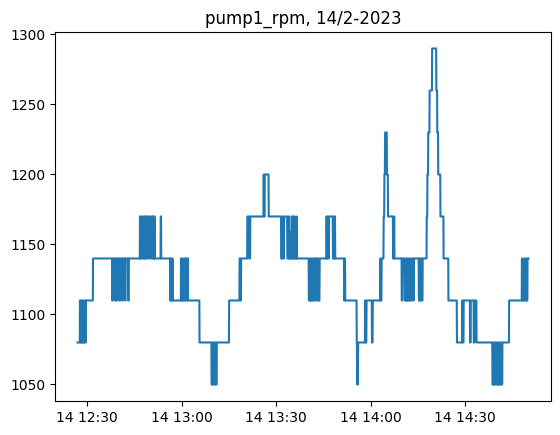

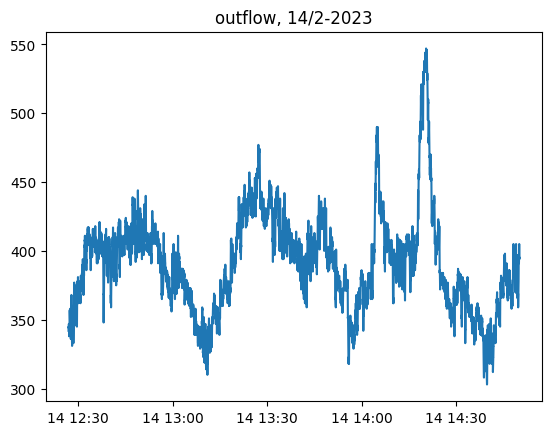

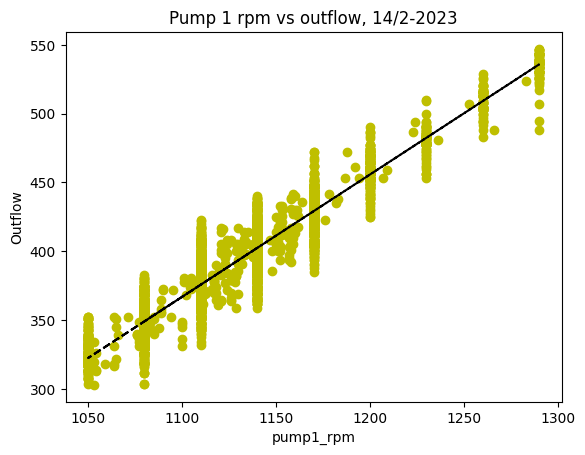

a = 0.8882511420214096
b = -610.1358843229259


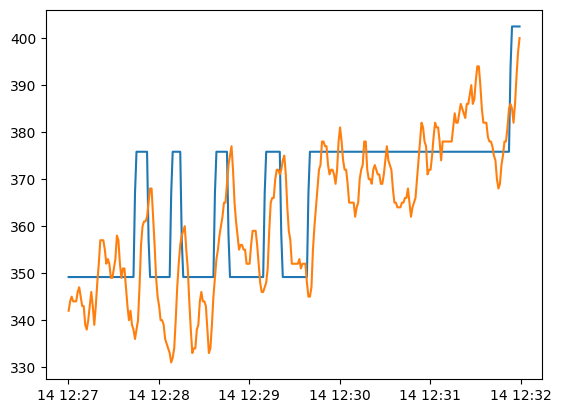

rrse = 0.30687949716108726


In [12]:
# finding a static model for pump 1 rpm vs outflow
# the flow rate or capacity is directly proportional to the pump speed, engineeringlibrary.org
pump1_rpm = df["pump1_rpm"]['2023-02-14 12:27:00':'2023-02-14 14:50:00']
outflow = df['outflow']['2023-02-14 12:27:00':'2023-02-14 14:50:00']

plt.plot(pump1_rpm)
plt.title("pump1_rpm, 14/2-2023")
plt.show()

plt.plot(outflow)
plt.title("outflow, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(pump1_rpm,outflow,1)
poly_rpm_outflow_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(pump1_rpm,outflow, 'yo', pump1_rpm, poly_rpm_outflow_fn(pump1_rpm), '--k')
plt.title("Pump 1 rpm vs outflow, 14/2-2023")
plt.xlabel('pump1_rpm')
plt.ylabel('Outflow')
plt.show()
# basic model a * x + b 
m,b = np.polyfit(pump1_rpm, outflow, 1)
print("a =",m)
print('b =',b)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import csv
from sysidentpy.metrics import root_relative_squared_error

a = 0.8882511420214096
b = -610.1358843229259

Qout = a * pump1_rpm + b

plt.plot(Qout[:300]) 
plt.plot(outflow[:300])
plt.show()

rrse = root_relative_squared_error(outflow, Qout)
print("rrse =",rrse)


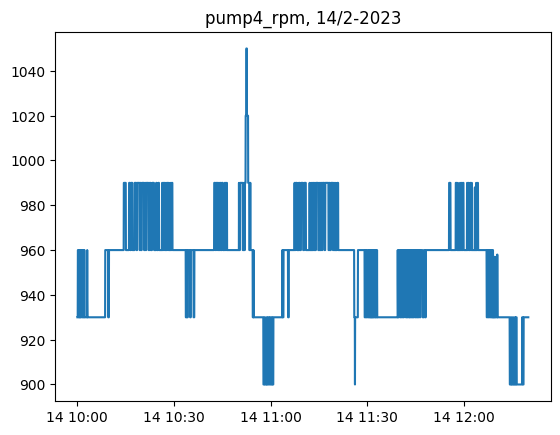

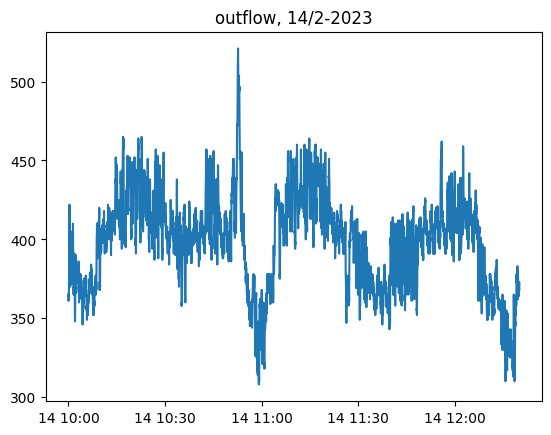

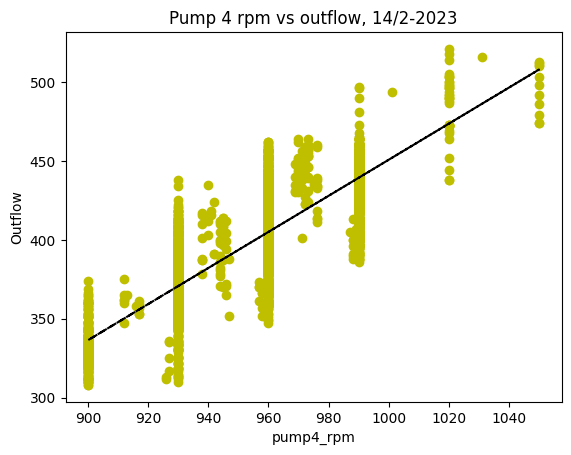

a = 1.143441301299032
b = -692.7086686635009


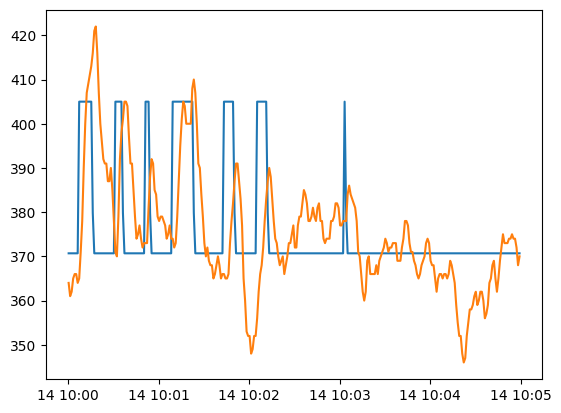

rrse = 0.5173882824271071


In [13]:
#--------------------------------SPEED VS OUTFLOW---------------------------------
# finding a static model for pump 4 rpm vs outflow
# the flow rate or capacity is directly proportional to the pump speed, engineeringlibrary.org
pump4_rpm = df["pump4_rpm"]['2023-02-14 10:00:00':'2023-02-14 12:20:00']
outflow = df['outflow']['2023-02-14 10:00:00':'2023-02-14 12:20:00']

plt.plot(pump4_rpm)
plt.title("pump4_rpm, 14/2-2023")
plt.show()

plt.plot(outflow)
plt.title("outflow, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(pump4_rpm,outflow,1)
poly_rpm_outflow_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(pump4_rpm,outflow, 'yo', pump4_rpm, poly_rpm_outflow_fn(pump4_rpm), '--k')
plt.title("Pump 4 rpm vs outflow, 14/2-2023")
plt.xlabel('pump4_rpm')
plt.ylabel('Outflow')
plt.show()
# basic model m * x + b  
m,b = np.polyfit(pump4_rpm, outflow, 1)
print("a =",m)
print('b =',b)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import csv
from sysidentpy.metrics import root_relative_squared_error

a = 1.143441301299032
b = -692.7086686635009

Qout = a * pump4_rpm + b

plt.plot(Qout[:300]) 
plt.plot(outflow[:300])
plt.show()

rrse = root_relative_squared_error(outflow, Qout)
print("rrse =",rrse)

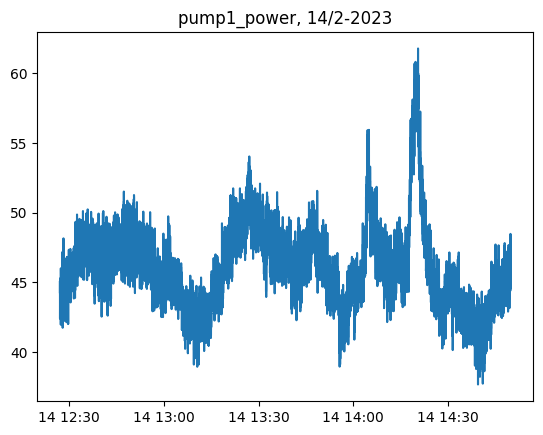

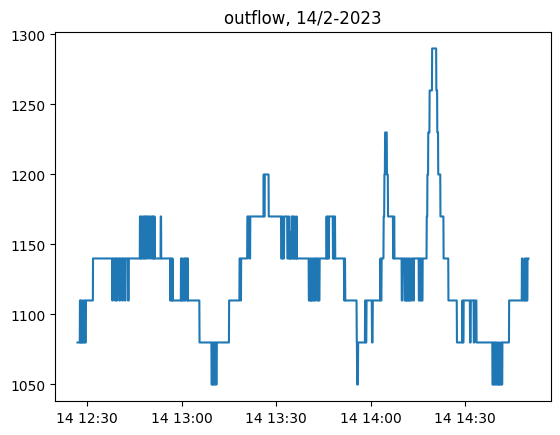

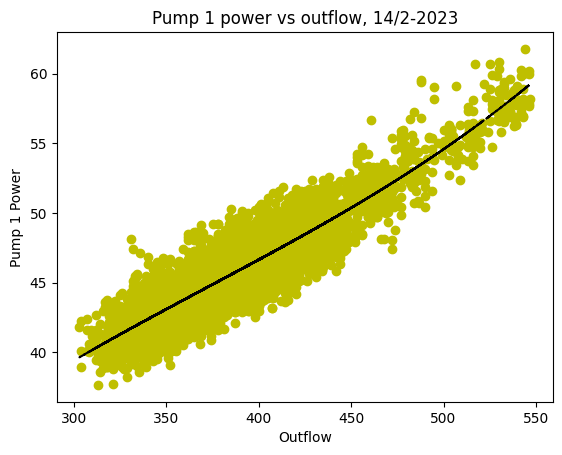

a = 4.1675214867426965e-07
b = -0.0004652341057511189
c = 0.24379248670451686
d = -3.1059962129596954


In [44]:
#--------------------------------SPEED VS OUTFLOW---------------------------------
# finding a static model for pump 1 power vs outflow
# the power required by the pump motor is directly proportional to the cube of the pump speed, engineeringlibrary.org
pump1_power = df["pump1_power"]['2023-02-14 12:27:00':'2023-02-14 14:50:00']
outflow = df['outflow']['2023-02-14 12:27:00':'2023-02-14 14:50:00']

plt.plot(pump1_power)
plt.title("pump1_power, 14/2-2023")
plt.show()

plt.plot(pump1_rpm)
plt.title("outflow, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(outflow,pump1_power,3)
poly_power_outflow_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(outflow,pump1_power, 'yo', outflow, poly_power_outflow_fn(outflow), '--k')
plt.title("Pump 1 power vs outflow, 14/2-2023")
plt.xlabel('Outflow')
plt.ylabel('Pump 1 Power')
plt.show()
# basic model ax^3 + bx^2 + cx + d
a,b,c,d = np.polyfit(outflow, pump1_power, 3)
print("a =",a)
print("b =",b)
print('c =',c)
print('d =',d)


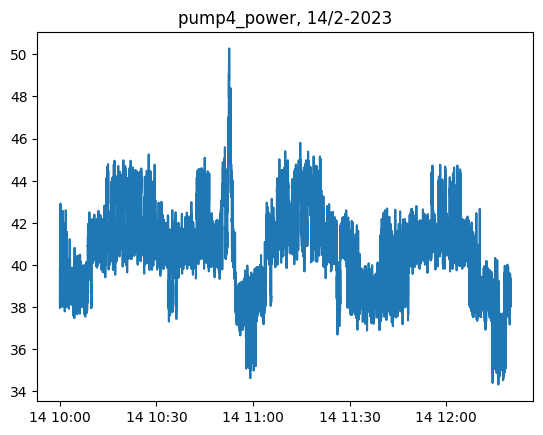

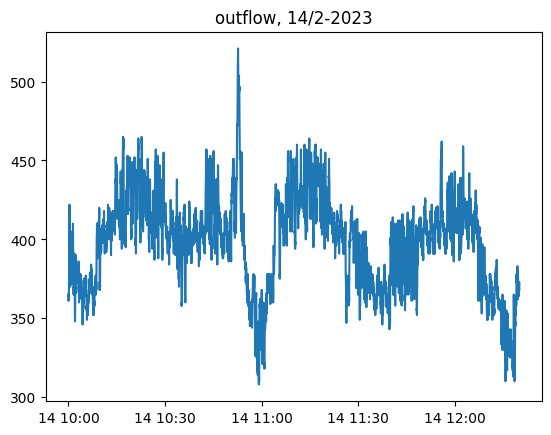

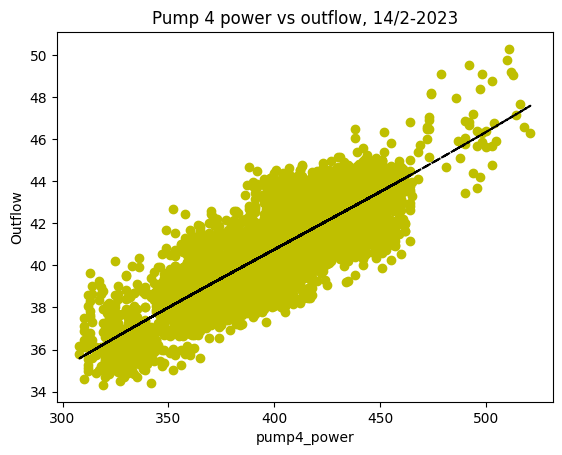

a = 1.6219740875817372e-07
b = -0.0001982311768066064
c = 0.13523404649972684
d = 7.99405823410659


In [42]:
# finding a static model for pump 4 power vs outflow
# the power required by the pump motor is directly proportional to the cube of the pump speed, engineeringlibrary.org
pump4_power = df["pump4_power"]['2023-02-14 10:00:00':'2023-02-14 12:20:00']
outflow = df['outflow']['2023-02-14 10:00:00':'2023-02-14 12:20:00']

plt.plot(pump4_power)
plt.title("pump4_power, 14/2-2023")
plt.show()

plt.plot(outflow)
plt.title("outflow, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(outflow,pump4_power,3)
poly_power_outflow_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(outflow,pump4_power, 'yo', outflow, poly_power_outflow_fn(outflow), '--k')
plt.title("Pump 4 power vs outflow, 14/2-2023")
plt.xlabel('Outflow')
plt.ylabel('Pump 4 Power')
plt.show()
# basic model ax^3 + bx^2 + cx + d
a,b,c,d = np.polyfit(outflow, pump4_power, 3)
print("a =",a)
print("b =",b)
print('c =',c)
print('d =',d)


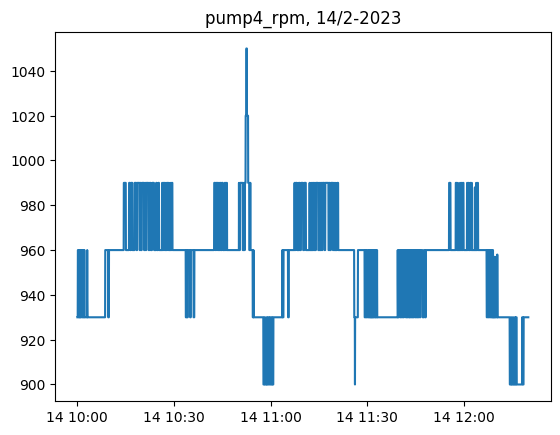

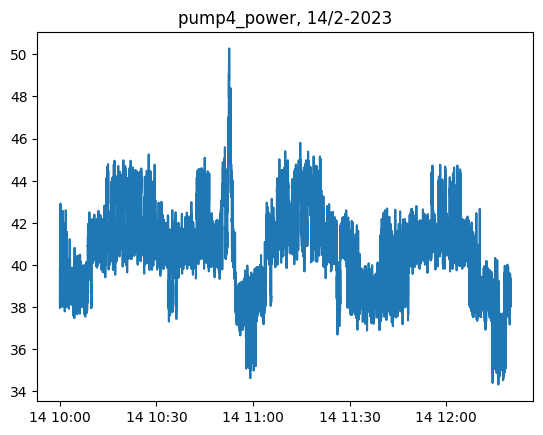

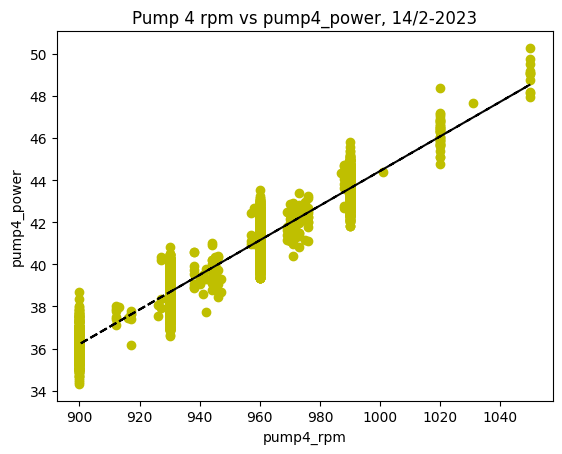

a = 0.08224441376351534
b = -37.810826933431954


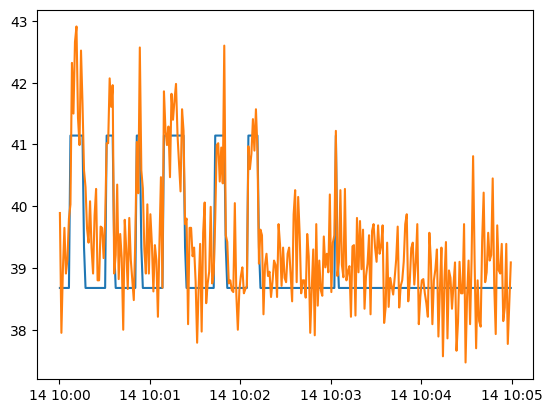

rrse = 0.3272721230102748


In [17]:
#--------------------------------SPEED VS POWER---------------------------------
pump4_rpm = df["pump4_rpm"]['2023-02-14 10:00:00':'2023-02-14 12:20:00']
pump4_power = df['pump4_power']['2023-02-14 10:00:00':'2023-02-14 12:20:00']

plt.plot(pump4_rpm)
plt.title("pump4_rpm, 14/2-2023")
plt.show()

plt.plot(pump4_power)
plt.title("pump4_power, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(pump4_rpm,pump4_power,1)
poly_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(pump4_rpm,pump4_power, 'yo', pump4_rpm, poly_fn(pump4_rpm), '--k')
plt.title("Pump 4 rpm vs pump4_power, 14/2-2023")
plt.xlabel('pump4_rpm')
plt.ylabel('pump4_power')
plt.show()
# basic model m * x + b  
a,b = np.polyfit(pump4_rpm, pump4_power, 1)
print("a =",a)
print('b =',b)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import csv
from sysidentpy.metrics import root_relative_squared_error

a = 0.08224441376351534
b = -37.810826933431954

Qout = a * pump4_rpm + b

plt.plot(Qout[:300]) 
plt.plot(pump4_power[:300])
plt.show()

rrse = root_relative_squared_error(pump4_power, Qout)
print("rrse =",rrse)

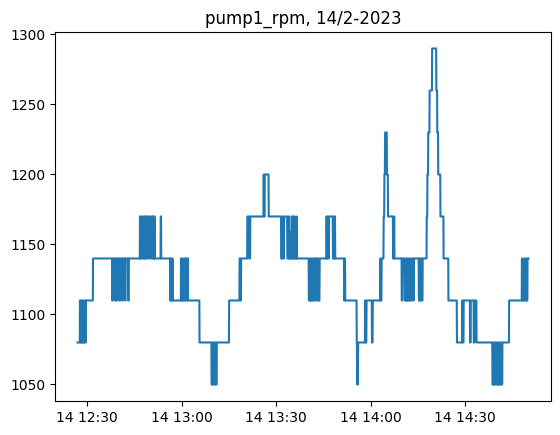

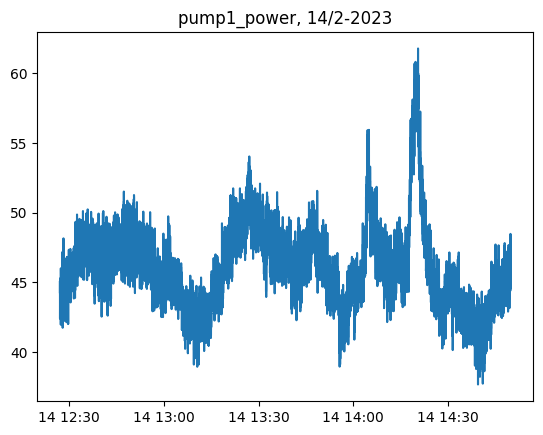

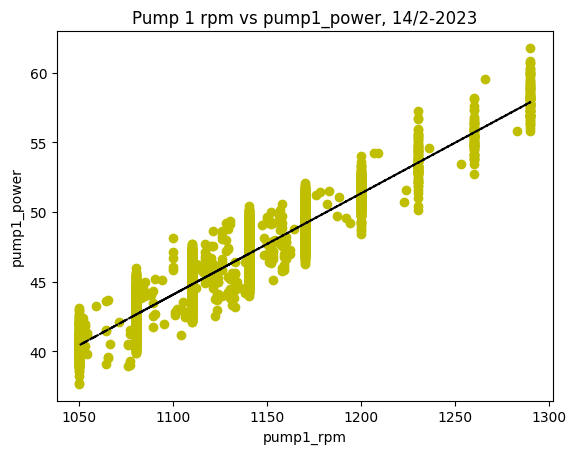

a = 0.07265282594807454
b = -35.83601170015122


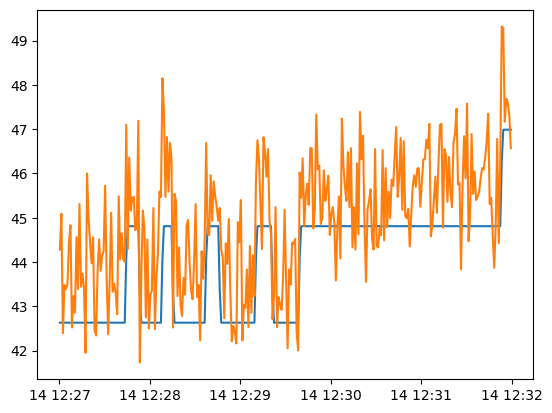

rrse = 0.359572269170473


In [19]:
#--------------------------------SPEED VS POWER---------------------------------
pump1_rpm = df["pump1_rpm"]['2023-02-14 12:27:00':'2023-02-14 14:50:00']
pump1_power = df['pump1_power']['2023-02-14 12:27:00':'2023-02-14 14:50:00']

plt.plot(pump1_rpm)
plt.title("pump1_rpm, 14/2-2023")
plt.show()

plt.plot(pump1_power)
plt.title("pump1_power, 14/2-2023")
plt.show()

# linear regression
coef = np.polyfit(pump1_rpm,pump1_power,1)
poly_fn = np.poly1d(coef) 


#plt.plot(height,outflow,'*')
plt.plot(pump1_rpm,pump1_power, 'yo', pump1_rpm, poly_fn(pump1_rpm), '--k')
plt.title("Pump 1 rpm vs pump1_power, 14/2-2023")
plt.xlabel('pump1_rpm')
plt.ylabel('pump1_power')
plt.show()
# basic model m * x + b  
a,b = np.polyfit(pump1_rpm, pump1_power, 1)
print("a =",a)
print('b =',b)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import csv
from sysidentpy.metrics import root_relative_squared_error

a = 0.07265282594807454
b = -35.83601170015122

Qout = a * pump1_rpm + b

plt.plot(Qout[:300]) 
plt.plot(pump1_power[:300])
plt.show()

rrse = root_relative_squared_error(pump1_power, Qout)
print("rrse =",rrse)